In [77]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial
from PIL import Image
import os


In [78]:
def idw(x, y, z, xi, yi, power=2):
    dist = scipy.spatial.distance.cdist(np.array([xi, yi]).T, np.array([x, y]).T, 'euclidean')
    dist[dist == 0] = 1e-10
    weights = 1 / dist**power
    weights /= weights.sum(axis=1)[:, None]
    zi = np.dot(weights, z)
    
    return zi

def interpolate(image, power=2):   
    known_coords = np.array(np.where(~np.isnan(image)))
    unknown_coords = np.array(np.where(np.isnan(image)))
    
    known_values = image[~np.isnan(image)]
    
    interpolated_values = idw(known_coords[1], known_coords[0], known_values,
                                            unknown_coords[1], unknown_coords[0], power)
    
    filled_image = image.copy()
    filled_image[np.isnan(image)] = interpolated_values
    
    return filled_image

def load_img(name):
    p = os.path.abspath(os.path.join(os.getcwd(), "../dataset", name))

    with Image.open(p) as im:
        gray = im.convert('L')
        gray.thumbnail((256, 256))
        return np.array(gray)

In [ ]:
image = np.zeros((10, 10))
image = np.random.random((10, 10))
image[3:5, 3:5] = np.nan

filled_image = interpolate(image)

plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Interpolated")
plt.imshow(filled_image, cmap='gray')
    
plt.show()

(221, 256)


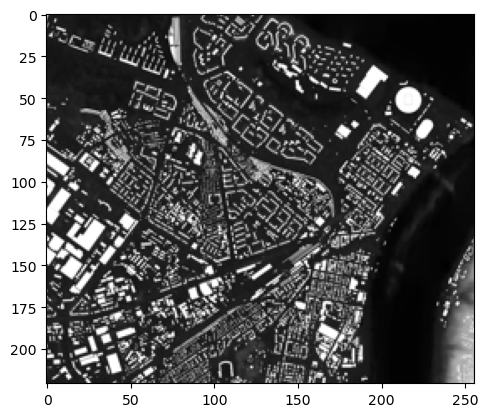

[[255 194  39 ...  19  19  19]
 [255 125  36 ...  19  19  19]
 [233  65  41 ...  19  19  19]
 ...
 [ 46  45  41 ... 206 202 187]
 [ 47  46  44 ... 217 221 188]
 [ 45  45  44 ... 225 228 190]]


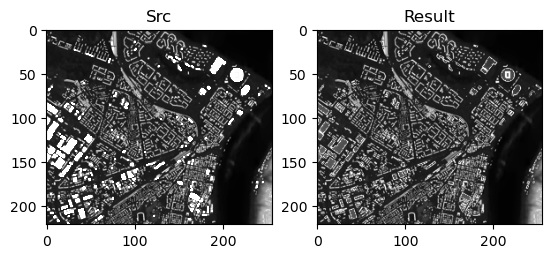

In [79]:
img = load_img("void_mask.png")
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

print(img)

img = img.astype(np.single)
img[img == 255] = np.nan

filled_image = interpolate(img)

plt.subplot(1, 2, 1)
plt.title("Src")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Result")
plt.imshow(filled_image, cmap='gray')
    
plt.show()